# **Quantum Algorithms**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
# Helper function to execute circuits
from qiskit.providers.ibmq import least_busy

# qc = QuantumCircuit to execute, 
# simulator = boolean, if True then run on qasm simulator, else run on the least busy quantum system
def execute_circuit(qc, simulator):
    if(simulator):
        backend = Aer.get_backend('qasm_simulator')
    else:
        backend = provider.backends(filters=lambda x: x.configuration().n_qubits > 2
                                   and not x.configuration().simulator)
    result = execute(qc, backend, shots=1024).result()
    return result

In [3]:
# State 1: 
state1 = QuantumCircuit(2)
# Initialize input to |0,0>
state1.barrier()

In [4]:
# Prepare the Bell state
state1.h(0)

In [5]:
state1.cx(0,1)

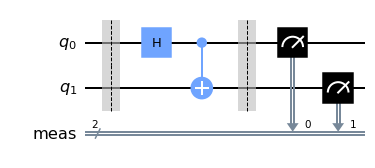

In [6]:
state1.measure_all()
state1.draw()

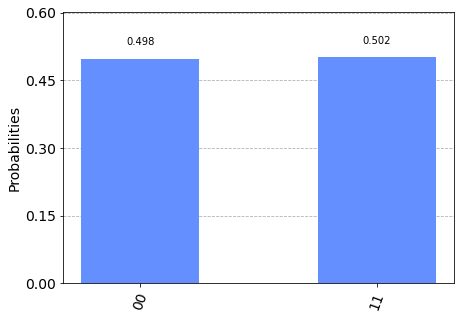

In [7]:
# Execute the Bell state 
result = execute_circuit(state1, True)
plot_histogram(result.get_counts(state1))

In [8]:
# State 2: 
state2 = QuantumCircuit(2)

# Initialize input state to |1,0>
state2.x(1)
state2.barrier()

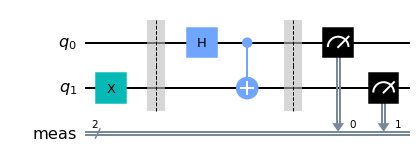

In [9]:
# Prepare the Bell state
state2.h(0)
state2.cx(0,1)
state2.measure_all()
state2.draw()

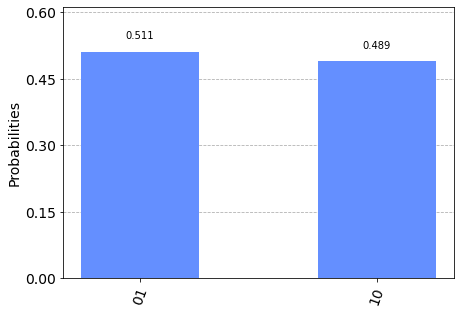

In [10]:
# Execute the Bell state |PHI+>
result = execute_circuit(state2, True)
plot_histogram(result.get_counts(state2))

Step 1: Prepare the input qubits, where q0=0, q1=1


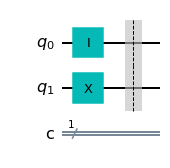

In [11]:
# Implement Deutsch's algorithm for a balanced function
qc = QuantumCircuit(2,1)

# Prepare the input qubits, where q0=0, q1=1
print('Step 1: Prepare the input qubits, where q0=0, q1=1')
qc.i(0)
qc.x(1)
qc.barrier()
qc.draw()

Step 2: Place each qubit in superposition by applying a Hadamard


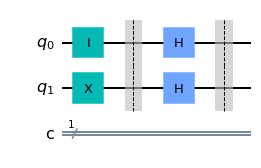

In [12]:
# Place each qubit in superposition by applying a Hadamard
print('Step 2: Place each qubit in superposition by applying a Hadamard')
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw()

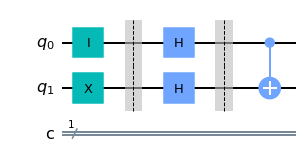

In [13]:
# Add a CNOT gate with the Control on q0 and Target on q1
qc.cx(0,1)
# Draw the circuit
qc.draw()

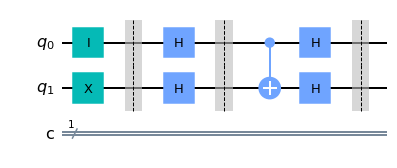

In [14]:
# Add the Hadamard gates to all qubits
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw()

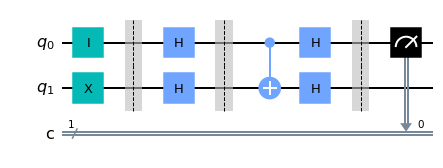

In [15]:
# Add measurement operator to the first qubit
qc.measure(0,0)
qc.draw()

Step 6: Execute the quantum circuit to view results.
{'1': 1024}


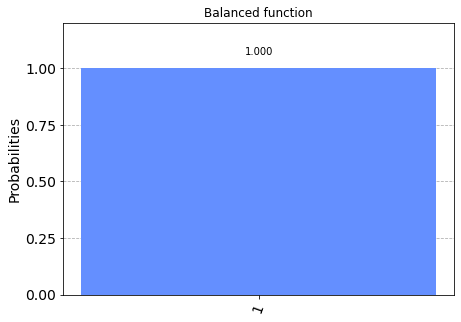

In [16]:
# Execute the quantum circuit on the simulator first to confirm our results.
print('Step 6: Execute the quantum circuit to view results.')
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot our results
print(counts)
plot_histogram(counts, title='Balanced function')

In [17]:
#Import the least_busy module and enable Qiskit job watcher
from qiskit.providers.ibmq import least_busy
%qiskit_job_watcher

#Identify the least busy devices 
backend_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 2
                                   and not x.configuration().simulator)
# Assign least busy device to backend
backend = least_busy(backend_devices)

#Print the least busy device
print('The least busy device: {}'.format(least_busy(backend_devices)))

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

The least busy device: ibmq_bogota


{'0': 92, '1': 932}


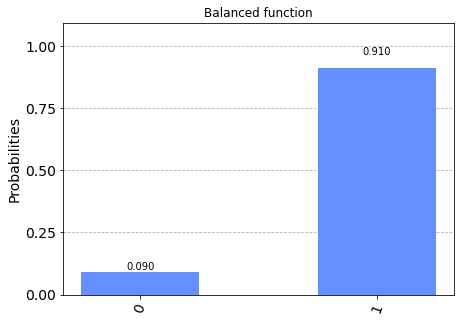

In [18]:
# Execute the previous constant circuit on a quantum device
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)
# Print and plot results
print(counts)
plot_histogram(counts, title='Balanced function')

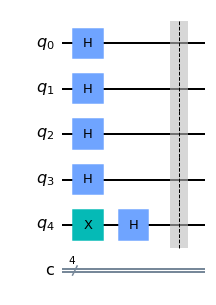

In [19]:
# Create the quantum circuit with both input registers X, and y
input_qubits = 4  # Refers to our X input register, 4-qubits
ancilla_qubit = 1 # Refers to our y input register, 1-qubit

# Total qubits in our quantum circuit
total_qubits = input_qubits + ancilla_qubit

# Generate the circuit
qc = QuantumCircuit(total_qubits, input_qubits)
# Set the X qubits in superposition
for idx in range(input_qubits):
    qc.h(idx)
    
# Set the y qubit to 1, then apply a Hadamard
qc.x(input_qubits)
qc.h(input_qubits)

qc.barrier()
qc.draw()

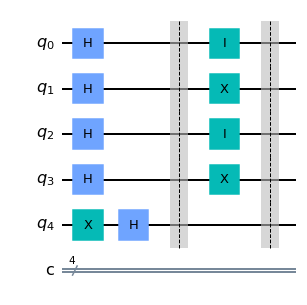

In [20]:
# Set the bit string which we wish to evaluate, in this case lets set '1010', where I indicates value 0, and x indicates value 1.
qc.i(0)
qc.x(1)
qc.i(2)
qc.x(3)

qc.barrier()
qc.draw()

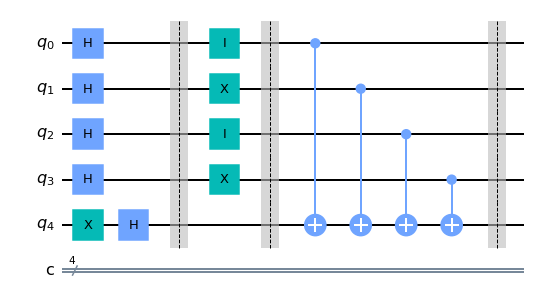

In [21]:
# Set oracle to either constant (output = 0s) 
# or balanced (output = 1s)

# In this example we will choose a balanced function 
for idx in range(input_qubits):
    qc.cx(idx, input_qubits)

qc.barrier()
qc.draw()

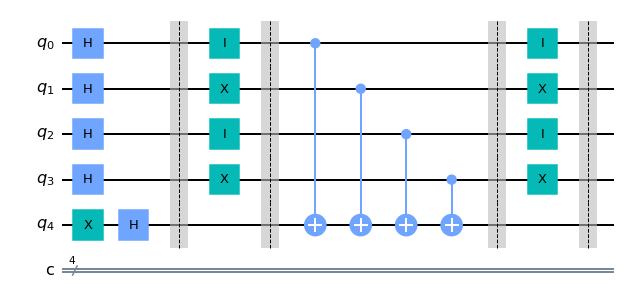

In [22]:
# Set the closing bit string we selected earlier to evaluate
qc.i(0)
qc.x(1)
qc.i(2)
qc.x(3)

qc.barrier()
qc.draw()

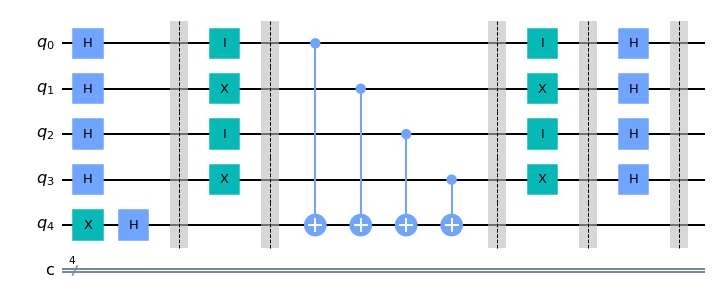

In [23]:
# Add the Hadamard gates to complete wrapping the oracle
for idx in range(4):
    qc.h(idx)

qc.barrier()
qc.draw()

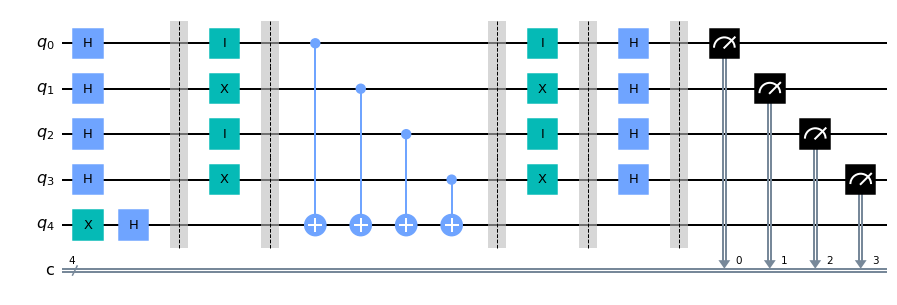

In [24]:
# Add measurements only to our inputs
qc.measure(range(4),range(4))

# Draw the circuit
qc.draw()

{'1111': 1024}


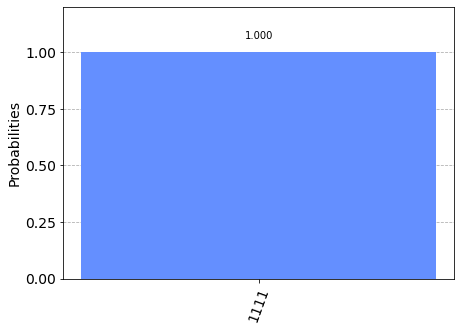

In [25]:
# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)

In [26]:
#Enable the job watcher widget
%qiskit_job_watcher

# Print all backends with at least 5 or more qubits
provider.backends(filters=lambda x: x.configuration().n_qubits >= total_qubits and not x.configuration().simulator and x.status().operational==True)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

[<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

{'0000': 21, '0001': 70, '0010': 12, '0011': 20, '0100': 14, '0101': 15, '0110': 13, '0111': 70, '1000': 13, '1001': 32, '1010': 14, '1011': 46, '1100': 56, '1101': 51, '1110': 75, '1111': 502}


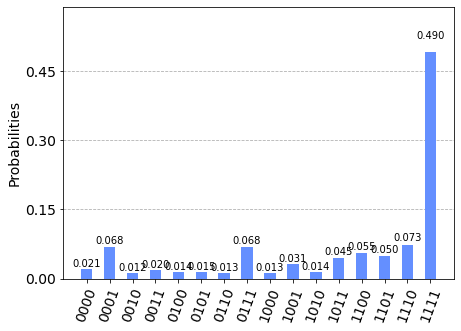

In [28]:
# Select any of the avialable backends above you have listed, 
# In this case we will pick 'ibmq_lima'
backend = provider.get_backend('ibmq_lima')

# Execute the previous circuit on a quantum device
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)

In [29]:
# Create your secret number
shh = '1010'

# Set the number of qubits to represent secret number and an ancilla qubit
input_qubits = len(shh)
ancilla_qubit = 1
total_qubits = input_qubits + ancilla_qubit

# Create the quantum circuit
qc = QuantumCircuit(total_qubits, input_qubits)

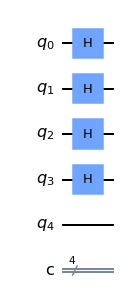

In [30]:
# Add Hadamard gates to the input qubits
for idx in range(input_qubits):
    qc.h(idx)

# Draw the input circuit
qc.draw()

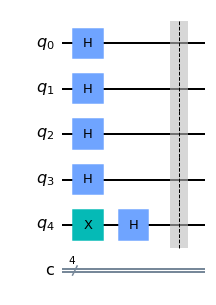

In [31]:
# Prepare the ancilla qubit of the circuit
qc.x(total_qubits-1)
qc.h(total_qubits-1)

qc.barrier()
  
# Draw the prepared circuit
qc.draw()

In [32]:
# Before creating the oracle, we need to adjust the qubits 
# Since they are ordered from left to right, we will reverse the secret number

# Current secret value
print('Secret before reverse: ', shh)

# Reverse order
shh = shh[::-1]
print('Secret after reverse: ', shh)

Secret before reverse:  1010
Secret after reverse:  0101


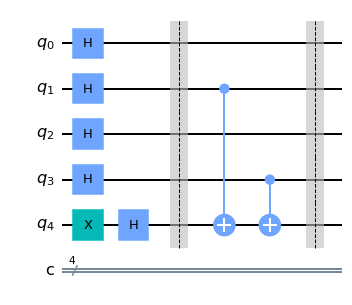

In [33]:
# Now that we have the right order, let's create the oracle
# by applying a CNOT, where the qubits set to '1' are the source
# and the targe would be the ancilla qubit
for idx in range(input_qubits):
    if shh[idx] == '1':
        qc.cx(idx, input_qubits)

qc.barrier()
qc.draw()

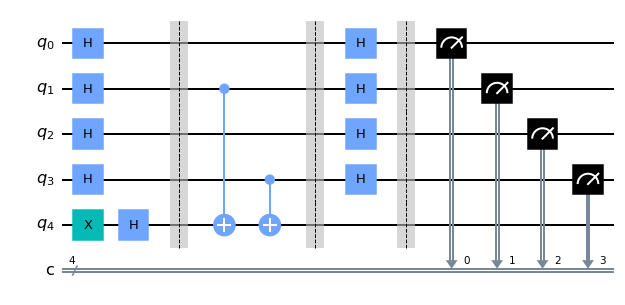

In [34]:
# Now let's close up our circuit with Hadamards applied to the input qubits
for idx in range(input_qubits):
    qc.h(idx)

qc.barrier()

# Finally, let's add measurements to our input qubits
qc.measure(range(input_qubits), range(input_qubits))

qc.draw()

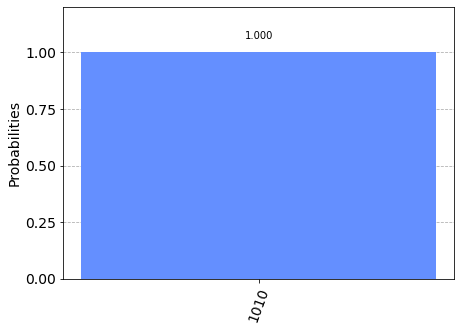

In [35]:
# Execute the circuit and plot the results
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [36]:
#Enable the job watcher widget
%qiskit_job_watcher

# Print all backends with at least 5 or more qubits
provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator and x.status().operational==True)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

[<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
# Choose whichever backend you wish from the list, 
# For this example, we will use 'ibmq_belem'
backend = provider.get_backend('ibmq_belem')

# Execute the previous circuit on a quantum device
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table